# Notebook Tasks

1. Computing backpropagation by hand
2. Computing Matrix mulitplications by hand

# Computational Graph

Most deep learning frameworks provide an automatic differentiation procedure to compute gradients
based on the backpropagation algorithm. In these frameworks, all computations
are represented as a graph and therefore also the gradient computation becomes a graph.
Therefore, graphs in computation and backpropagation are both crucial deep learning fundamentals for the training of neural networks. 

Mathematical statements can be represented using computational graphs. This is comparable to a descriptive language that provides a functional description of the necessary computation in the context of deep learning models.


Below you find an example of a simple network depicted as a computational graph.   

From the chain rule we have that

$$
\frac{\partial l}{\partial h_{1}}=\frac{\partial l}{\partial h_{3}} \frac{\partial h_{3}}{\partial h_{2}} \frac{\partial h_{2}}{\partial h_{1}}\left(=\frac{\partial l}{\partial h_{2}} \frac{\partial h_{2}}{\partial h_{1}}\right)
$$

which can be represented as a computational graph as follows:

![graph.jpg](images/graph.jpg)

**Note:** Gradient computations are shown in black, application of the chain rule in green

Hence, we will use a computational graph to compute the derivatives of a function, for **task 1**. And since we are using a Transformer model, which uses matrix mulitplication for computing the different weight matrices, we will look into matrix multiplication in the **second task**.

# Backpropagation

The chain rule with __Newton__ notation: 

$(f \circ g)^{\prime}(x)=f^{\prime}(g(x)) \cdot g^{\prime}(x)$ <br> <br>

The chain rule with __Leibniz__ notation: 

$\frac{d z}{d x}=\frac{d z}{d y} \cdot \frac{d y}{d x}$

We will use the Leibniz notation for our computations. 

For instance, if we want to compute the derivative of $(2 x+1)^{7}$, we would do the following:

$\begin{aligned} \frac{d}{d x}(2 x+1)^{7} &=\left[\frac{d}{d(2 x+1)}(2 x+1)^{7}\right] \frac{d(2 x+1)}{d x} \\ &=7(2 x+1)^{6} \cdot 2 \\ &=14(2 x+1)^{6} \end{aligned}$

So, basically, with the chain rule we must first take the derivative of the outer function keeping the inside function untouched. Then we multiply by the derivative of the inside function.


Now let's look how we can actually compute the backpropagation with a computational graph. The compuations consists of the following two computations:

- Forward computation
- Backward computation

The process for determining the value of the mathematical expression represented by computational graphs is known as the __forward pass__. Forward pass refers to the process of sending data from variables from the left (input) to the right (output) in a forward manner.

Let us consider a concrete example to demonstrate its working:

$f(x, y, z)=(x+y) z$ <br>
e.g. $\mathrm{x}=-2, \mathrm{y}=5, \mathrm{z}=-4$

We want: $\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z}$ 
<br>
<br>

1. __Forward pass:__ Compute outputs $q = x + y$, $f = qz$
2. __Backward pass:__ Compute derivatives $\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}, \frac{\partial f}{\partial z}$ 

![backprob.drawio.png](images/backprob.drawio.png)

$q = x +y $  &nbsp;&nbsp;&nbsp;  $\frac{\partial q}{\partial x}= 1, $ &nbsp;&nbsp;&nbsp; $\frac{\partial q}{\partial y}= 1$
<br>
<br>
$\frac{\partial f}{\partial f}= 1 $
<br>
<br>

$f = qz $  &nbsp;&nbsp;&nbsp;  $\frac{\partial f}{\partial q}= z, $ &nbsp;&nbsp;&nbsp; $\frac{\partial f}{\partial z}= q$


Chain rule:  $\frac{\partial f}{\partial y}= \frac{\partial f}{\partial q} \frac{\partial q}{\partial y}$, &nbsp;&nbsp;&nbsp;  $\frac{\partial f}{\partial x}= \frac{\partial f}{\partial q} \frac{\partial q}{\partial x}$

- The gradient computation can be automatically inferred from the symbolic expression of the forward propagation.
- Each node type needs to know how to compute its output and how to compute the gradient wrt its inputs given the gradient wrt its output.
- Modern DL frameworks (Tensorflow, PyTorch, etc.) do backpropagation for you but mainly leave layer/node writer to hand-calculate the local derivative.

Which means we do the following:
1. Forward propagation: visit nodes in topological sort order
    - Compute value of node given predecessors
2. Backward propagation:
    - initialize output gradient = 1
    - visit nodes in reverse order: Compute gradient wrt each node using gradient wrt successors
        $\left\{y_{1}, y_{2}, \ldots y_{n}\right\}=\text { successors of } x $, 
        $$
        \frac{\partial z}{\partial x}=\sum_{i=1}^{n} \frac{\partial z}{\partial y_{i}} \frac{\partial y_{i}}{\partial x}
        $$

If computationally done right, big $O()$ complexity of forward propagation and backward propagation is the same.

##  Computational graph by hand

- Draw the computational graph of the following function: $f = (x+y)z $ &nbsp;&nbsp; with &nbsp;&nbsp; $x=1, y = 3, z = -3$
- Compute forward and backward propagation 

![compgraph.JPG](images/compgraph.JPG)

Forrward Pass:  <br><br>
$q = x + y = 1 + 3 = 4$ <br><br>
$f = q * z = 4 * (-3) = -12$
Backward Pass: <br><br>
$\frac{\partial f}{\partial q}= z =  -3$, <br><br>
$\frac{\partial f}{\partial x}= 1 * z = -3$ <br><br>
$\frac{\partial f}{\partial y}= 1 * z = -3$ <br><br>
$\frac{\partial f}{\partial z}= q = 1 + 3 = 4$ <br><br>

##  Backpropagation with torch

In [1]:
import torch

# Define the variables
x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([3.0], requires_grad=True)
z = torch.tensor([-3.0], requires_grad=True)

# Define the function
f = (x + y) * z

# Compute the gradients
f.backward()

# Print the gradients
print("df/dx:", x.grad)
print("df/dy:", y.grad)
print("df/dz:", z.grad)

df/dx: tensor([-3.])
df/dy: tensor([-3.])
df/dz: tensor([4.])


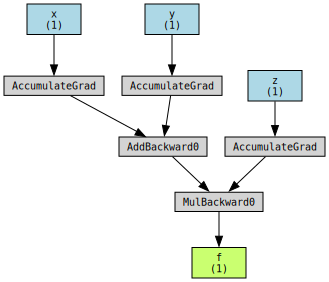

df/dx: tensor([-3.])
df/dy: tensor([-3.])
df/dz: tensor([4.])


In [18]:
import torch
from torchviz import make_dot
from IPython.display import display

# Define the variables
x = torch.tensor([1.0], requires_grad=True)
y = torch.tensor([3.0], requires_grad=True)
z = torch.tensor([-3.0], requires_grad=True)

# Define the function
f = (x + y) * z

# Compute the gradients
f.backward()

# Create a dictionary that maps the tensor objects to their string representations
names = {"x": x, "y": y, "z": z, "f": f}

# Visualize the graph
dot = make_dot(f, params=names)

# Visualize the graph
#dot = make_dot(f)
#dot.view()
# Display the graph inline
display(dot)


# Print the gradients
print("df/dx:", x.grad)
print("df/dy:", y.grad)
print("df/dz:", z.grad)

# Matrix Multiplication

## Definition of matrix multiplication

Let A = $(a_{ij})$ be an $(m \times n)$ matrix, and let $B= (b_{ij})$ be and $(r \times s)$ matrix. If $n = r$, then the __product__ $AB$ is the $(m \times s)$ matrix defined by: 

$$
(A B)_{i j}=\sum_{k=1}^{n} a_{i k} b_{k j}
$$

If $n \neq r$, then the product $AB$ is __not defined__.

To illustrate the above formula, let's look at a visual example how to compute the matrix multiplication:
![matrix_multiplication.png](images/matrix_multiplication.png)

Thus the product $AB$ is defined only when the inside dimensions of $A$ and $B$ are equal. In this case the outside dimensions, $m$ and $s$, give the size of $AB$. Furthermore, the $ij^{th}$ entry of $AB$ is the scalar product of the $i^{th}$ row of $A$ with the $j^{th}$ column of $B$.
For instance,

$$\left[\begin{array}{rrr}2 & 1 & -3 \\ -2 & 2 & 4\end{array}\right]\left[\begin{array}{rr}-1 & 2 \\ 0 & -3 \\ 2 & 1\end{array}\right]=\left[\begin{array}{cc}2(-1)+1(0)+(-3) 2 & 2(2)+1(-3)+(-3) 1 \\ (-2)(-1)+2(0)+4(2) & (-2) 2+2(-3)+4(1)\end{array}\right]=\left[\begin{array}{rr}-8 & -2 \\ 10 & -6\end{array}\right]$$

## Matrix Multiplication

Compute the matrix multiplication, $AB$, of the following two matrices:

$$A = \left[\begin{array}{rrr}1 & 0 & -2 \\ 0 & 1 & 1\end{array}\right],  B = \left[\begin{array}{rr}3 & 1 \\ -1 & -2 \\ 1 & 1\end{array}\right]$$

$$AB  =\left[\begin{array}{rrr}1 & 0 & -2 \\ 0 & 1 & 1\end{array}\right]\left[\begin{array}{rr}3 & 1 \\ -1 & -2 \\ 1 & 1\end{array}\right]=\left[\begin{array}{cc}1(3)+0(-1)+(-2)1 & 1(1)+0(-2)+(-2) 1 \\ 0(3)+1(-1)+1(1) & 0(1)+1(-2)+1(1)\end{array}\right]=\left[\begin{array}{rr}1 & -1 \\ 0 & -1\end{array}\right]$$

In [19]:
import numpy as np

# Define the matrices
A = np.array([[1, 0, -2], [0, 1, 1]])
B = np.array([[3, 1], [-1, -2], [1, 1]])

# Compute the matrix multiplication
C = np.dot(A, B)

print(f"AB =\n{C}")

AB =
[[ 1 -1]
 [ 0 -1]]
